### Основы

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('data/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [7]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [8]:
df.shape

(1000, 8)

In [9]:
df.groupby('gender').aggregate({'writing score' : 'mean'})

,writing score
gender,
female,72.467181
male,63.311203


In [10]:
df.size

8000

In [11]:
df.iloc[0:5, 0:3]

,gender,race/ethnicity,parental level of education
0,female,group B,bachelor's degree
1,female,group C,some college
2,female,group B,master's degree
3,male,group A,associate's degree
4,male,group C,some college


In [13]:
df.iloc[[0, 3, 5, -1], [0, 7, -1]]

,gender,writing score,writing score
0,female,74,74
3,male,44,44
5,female,78,78
999,female,86,86


In [18]:
df_with_names = df.iloc[[0, 3, 4, 7, 8]]

In [21]:
df_with_names.index = ['Cersei', 'Tywin', 'Gregor', 'Joffrey', 'Ilyn Payne']
df_with_names

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
Cersei,female,group B,bachelor's degree,standard,none,72,72,74
Tywin,male,group A,associate's degree,free/reduced,none,47,57,44
Gregor,male,group C,some college,standard,none,76,78,75
Joffrey,male,group B,some college,free/reduced,none,40,43,39
Ilyn Payne,male,group D,high school,free/reduced,completed,64,64,67


In [28]:
type(df_with_names.loc[['Cersei', 'Gregor'], ['race/ethnicity', 'lunch']])

pandas.core.frame.DataFrame

In [27]:
type(df_with_names.iloc[:, 0])

pandas.core.series.Series

In [37]:
series1 = pd.Series([1, 2, 3], index = ['Cersei', 'Gregor', 'Tywin'])
series2 = pd.Series([4, 5, 6, 7], index = ['Cersei', 'Gregor', 'Tywin', 'Joffrey'])

In [38]:
pd.DataFrame({'col_name1' : series1, 'col_name2' : series2})

,col_name1,col_name2
Cersei,1.0,4
Gregor,2.0,5
Joffrey,NaN,7
Tywin,3.0,6


In [41]:
df_with_names['gender'].shape

(5,)

In [42]:
df_with_names[['gender']].shape

(5, 1)

In [52]:
df.index

RangeIndex(start=0, stop=1000, step=1)

In [62]:
df = pd.read_csv('data/titanic.csv')
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

### Фильтрация данных

In [288]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.loc[df.gender == 'female', ['gender', 'writing score']]

,gender,writing score
0,female,74
1,female,88
2,female,93
5,female,78
6,female,92
...,...,...
993,female,74
995,female,95
997,female,65
998,female,77


In [76]:
mean_writing_score = df['writing score'].mean()

In [77]:
df.loc[df['writing score'] > mean_writing_score]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


In [80]:
# дурной тон задавать query, как query, нужно более подробно
query = (df['writing score'] > mean_writing_score) & (df['gender'] == 'female')
query

0       True
1       True
2       True
3      False
4      False
       ...  
995     True
996    False
997    False
998     True
999     True
Length: 1000, dtype: bool

In [82]:
result = df[query]
result

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
...,...,...,...,...,...,...,...,...
992,female,group D,associate's degree,free/reduced,none,55,76,76
993,female,group D,bachelor's degree,free/reduced,none,62,72,74
995,female,group E,master's degree,standard,completed,88,99,95
998,female,group D,some college,standard,completed,68,78,77


**Задание:**

У какой доли студентов из датасэта в колонке lunch указано free/reduced?

In [93]:
df[df['lunch'] == 'free/reduced'].shape[0]/df.shape[0]

0.355

**Задание:**

Как различается среднее и дисперсия оценок по предметам у групп студентов со стандартным или урезанным ланчем?

In [118]:
df.loc[df['lunch'] == 'standard'].describe()

,math score,reading score,writing score
count,645.000000,645.000000,645.000000
mean,70.034109,71.654264,70.823256
std,13.653501,13.830602,14.339487
min,19.000000,26.000000,22.000000
25%,61.000000,63.000000,62.000000
50%,69.000000,72.000000,72.000000
75%,80.000000,82.000000,81.000000
max,100.000000,100.000000,100.000000


In [119]:
df.loc[df['lunch'] == 'free/reduced'].describe()

,math score,reading score,writing score
count,355.000000,355.000000,355.000000
mean,58.921127,64.653521,63.022535
std,15.159956,14.895339,15.433823
min,0.000000,17.000000,10.000000
25%,49.000000,56.000000,53.000000
50%,60.000000,65.000000,64.000000
75%,69.000000,75.000000,74.000000
max,100.000000,100.000000,100.000000


---

In [115]:
mean_marks_standart_lunch = df.loc[df['lunch'] == 'standard', ['math score', 'reading score', 'writing score']].mean()
dispersion_marks_standart_lunch = df.loc[df['lunch'] == 'standard', ['math score', 'reading score', 'writing score']].var()
mean_marks_reduced_lunch = df.loc[df['lunch'] == 'free/reduced', ['math score', 'reading score', 'writing score']].mean()
dispersion_marks_reduced_lunch = df.loc[df['lunch'] == 'free/reduced', ['math score', 'reading score', 'writing score']].var()
print(f'''
mean_marks_standart_lunch: 
{mean_marks_standart_lunch}

dispersion_marks_standart_lunch: 
{dispersion_marks_standart_lunch}

mean_marks_reduced_lunch: 
{mean_marks_reduced_lunch}

dispersion_marks_reduced_lunch: 
{dispersion_marks_reduced_lunch}
''')


mean_marks_standart_lunch: 
math score       70.034109
reading score    71.654264
writing score    70.823256
dtype: float64

dispersion_marks_standart_lunch: 
math score       186.418089
reading score    191.285560
writing score    205.620887
dtype: float64

mean_marks_reduced_lunch: 
math score       58.921127
reading score    64.653521
writing score    63.022535
dtype: float64

dispersion_marks_reduced_lunch: 
math score       229.824270
reading score    221.871139
writing score    238.202881
dtype: float64



In [121]:
#qf.query()
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [300]:
df = df \
    .rename(columns = 
            {'test preparation course' : 'test_preparation_course',
            'math score' : 'math_score',
            'reading score' : 'reading_score',
            'writing score' : 'writing_score'})
df.head()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [301]:
df.math_score

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math_score, Length: 1000, dtype: int64

In [302]:
reading_score_query = 95

In [303]:
df.query("writing_score > 75 & gender == 'female' & reading_score > @reading_score_query")

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
106,female,group D,master's degree,standard,none,87,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
165,female,group C,bachelor's degree,standard,completed,96,100,100
179,female,group D,some high school,standard,completed,97,100,100
373,female,group D,some college,standard,completed,82,97,96
403,female,group D,high school,standard,completed,88,99,100
458,female,group E,bachelor's degree,standard,none,100,100,100
514,female,group B,master's degree,free/reduced,completed,77,97,94
546,female,group A,some high school,standard,completed,92,100,97
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100


In [304]:
list(df)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test_preparation_course',
 'math_score',
 'reading_score',
 'writing_score']

In [305]:
score_columns = [i for i in list(df) if 'score' in i]
score_columns

['math_score', 'reading_score', 'writing_score']

In [306]:
df[score_columns].head()

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


In [307]:
df.filter(like = 'score')

,math_score,reading_score,writing_score
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75
...,...,...,...
995,88,99,95
996,62,55,55
997,59,71,65
998,68,78,77


In [308]:
df.filter(like = '2', axis = 0)

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
2,female,group B,master's degree,standard,none,90,95,93
12,female,group B,high school,standard,none,65,81,73
20,male,group D,high school,standard,none,66,69,63
21,female,group B,some college,free/reduced,completed,65,75,70
22,male,group D,some college,standard,none,44,54,53
...,...,...,...,...,...,...,...,...
952,female,group E,some high school,free/reduced,none,74,74,72
962,female,group E,associate's degree,standard,none,100,100,100
972,female,group A,high school,free/reduced,completed,53,50,60
982,male,group B,some high school,standard,completed,79,85,86


### Группировка и агрегация

In [309]:
df.groupby('gender').mean()

,math_score,reading_score,writing_score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [310]:
mean_scores = df.groupby(['gender', 'race/ethnicity']) \
    .aggregate({'math_score':'mean', 'reading_score':'mean'}) \
    .rename(columns = {'math_score':'mean_math_score', 'reading_score':'mean_reading_score'})
mean_scores

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923
       group C               62.033333           71.944444
       group D               65.248062           74.046512
       group E               70.811594           75.840580
male   group A               63.735849           61.735849
       group B               65.930233           62.848837
       group C               67.611511           65.424460
       group D               69.413534           66.135338
       group E               76.746479           70.295775

In [311]:
mean_scores.loc[[('female', 'group A'), ('female', 'group B')]]

mean_math_score  mean_reading_score
gender race/ethnicity                                     
female group A               58.527778           69.000000
       group B               61.403846           71.076923

In [312]:
mean_scores = df.groupby(['gender', 'race/ethnicity'], as_index=False) \
    .aggregate({'math_score':'mean', 'reading_score':'mean'}) \
    .rename(columns = {'math_score':'mean_math_score', 'reading_score':'mean_reading_score'})
mean_scores

,gender,race/ethnicity,mean_math_score,mean_reading_score
0,female,group A,58.527778,69.000000
1,female,group B,61.403846,71.076923
2,female,group C,62.033333,71.944444
3,female,group D,65.248062,74.046512
4,female,group E,70.811594,75.840580
5,male,group A,63.735849,61.735849
6,male,group B,65.930233,62.848837
7,male,group C,67.611511,65.424460
8,male,group D,69.413534,66.135338
9,male,group E,76.746479,70.295775


In [313]:
df.math_score.nunique()

81

In [314]:
df.groupby(['gender', 'race/ethnicity']).math_score.unique()

gender  race/ethnicity
female  group A           [50, 55, 41, 58, 51, 44, 71, 38, 49, 59, 47, 7...
        group B           [72, 90, 71, 88, 38, 65, 18, 63, 53, 47, 79, 5...
        group C           [69, 54, 67, 58, 66, 71, 33, 0, 60, 39, 73, 76...
        group D           [62, 69, 74, 50, 75, 57, 59, 58, 61, 71, 73, 6...
        group E           [56, 50, 82, 62, 63, 99, 42, 66, 75, 81, 83, 4...
male    group A           [47, 78, 73, 39, 62, 80, 50, 54, 57, 77, 72, 6...
        group B           [40, 69, 57, 59, 65, 67, 61, 44, 49, 79, 60, 9...
        group C           [76, 58, 88, 46, 70, 55, 82, 53, 61, 49, 27, 7...
        group D           [64, 40, 66, 44, 74, 88, 52, 58, 45, 63, 42, 6...
        group E           [97, 81, 53, 77, 79, 30, 72, 66, 83, 87, 70, 1...
Name: math_score, dtype: object

In [317]:
df.sort_values(['gender', 'math_score'], ascending=False) \
    .groupby('gender').head()

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score
149,male,group E,associate's degree,free/reduced,completed,100,100,93
623,male,group A,some college,standard,completed,100,96,86
625,male,group D,some college,standard,completed,100,97,99
916,male,group E,bachelor's degree,standard,completed,100,100,100
306,male,group E,some college,standard,completed,99,87,81
451,female,group E,some college,standard,none,100,92,97
458,female,group E,bachelor's degree,standard,none,100,100,100
962,female,group E,associate's degree,standard,none,100,100,100
114,female,group E,bachelor's degree,standard,completed,99,100,100
263,female,group E,high school,standard,none,99,93,90


In [184]:
df['total_score'] = df.math_score + df.reading_score + df.writing_score
df

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [186]:
df = df.assign(total_score_log = np.log(df.total_score))
df

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


In [191]:
df.drop(['total_score', 'lunch'], axis = 1)

,gender,race/ethnicity,parental level of education,test_preparation_course,math_score,reading_score,writing_score,total_score_log
0,female,group B,bachelor's degree,none,72,72,74,5.384495
1,female,group C,some college,completed,69,90,88,5.509388
2,female,group B,master's degree,none,90,95,93,5.627621
3,male,group A,associate's degree,none,47,57,44,4.997212
4,male,group C,some college,none,76,78,75,5.433722
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,completed,88,99,95,5.641907
996,male,group C,high school,none,62,55,55,5.147494
997,female,group C,high school,completed,59,71,65,5.273000
998,female,group D,some college,completed,68,78,77,5.407172


In [192]:
df

,gender,race/ethnicity,parental level of education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,total_score_log
0,female,group B,bachelor's degree,standard,none,72,72,74,218,5.384495
1,female,group C,some college,standard,completed,69,90,88,247,5.509388
2,female,group B,master's degree,standard,none,90,95,93,278,5.627621
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,4.997212
4,male,group C,some college,standard,none,76,78,75,229,5.433722
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,5.641907
996,male,group C,high school,free/reduced,none,62,55,55,172,5.147494
997,female,group C,high school,free/reduced,completed,59,71,65,195,5.273000
998,female,group D,some college,standard,completed,68,78,77,223,5.407172


**Задание:**

Пересчитаем число ног у героев игры Dota2! Сгруппируйте героев из датасэта по числу их ног (колонка legs).

In [225]:
df = pd.read_csv('data/dota_hero_stats.csv')
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [226]:
df.legs.value_counts()

2    95
0    11
4     7
6     3
8     1
Name: legs, dtype: int64

In [227]:
df.groupby('legs').count()

,Unnamed: 0,attack_type,id,localized_name,name,primary_attr,roles
legs,,,,,,,
0,11,11,11,11,11,11,11
2,95,95,95,95,95,95,95
4,7,7,7,7,7,7,7
6,3,3,3,3,3,3,3
8,1,1,1,1,1,1,1


In [228]:
df = pd.read_csv('data/accountancy.csv')
df.head()

,Unnamed: 0,Executor,Type,Salary
0,0,Pupa,D,63
1,1,Pupa,A,158
2,2,Pupa,D,194
3,3,Pupa,E,109
4,4,Loopa,E,184


**Задание:**

К нам поступили данные из бухгалтерии о заработках Лупы и Пупы за разные задачи! Посмотрите у кого из них больше средний заработок в различных категориях (колонка Type) и заполните таблицу, указывая исполнителя с большим заработком в каждой из категорий.

In [229]:
df.groupby(['Type', 'Executor'])['Salary'].mean()

Type  Executor
A     Loopa        58.000000
      Pupa        160.833333
B     Loopa       145.166667
      Pupa         77.000000
C     Loopa       154.333333
      Pupa         74.500000
D     Loopa       137.714286
      Pupa        146.500000
E     Loopa       164.000000
      Pupa        131.200000
F     Loopa       238.000000
      Pupa        136.250000
Name: Salary, dtype: float64

In [230]:
df.groupby(['Type', 'Executor']).Salary.mean()

Type  Executor
A     Loopa        58.000000
      Pupa        160.833333
B     Loopa       145.166667
      Pupa         77.000000
C     Loopa       154.333333
      Pupa         74.500000
D     Loopa       137.714286
      Pupa        146.500000
E     Loopa       164.000000
      Pupa        131.200000
F     Loopa       238.000000
      Pupa        136.250000
Name: Salary, dtype: float64

**Задача:**

Продолжим исследование героев Dota2. Сгруппируйте по колонкам attack_type и primary_attr и выберите самый распространённый набор характеристик.

In [318]:
df = pd.read_csv('data/dota_hero_stats.csv')
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


In [345]:
df.groupby(['attack_type', 'primary_attr']).count().sort_values('id', ascending=False)

Unnamed: 0  id  legs  localized_name  name  roles
attack_type primary_attr                                                   
Ranged      int                   40  40    40              40    40     40
Melee       str                   35  35    35              35    35     35
            agi                   19  19    19              19    19     19
Ranged      agi                   18  18    18              18    18     18
            str                    3   3     3               3     3      3
Melee       int                    2   2     2               2     2      2

**Задание:**

Пользуясь предыдущими данными, укажите через пробел (без запятых) чему равны минимальная, средняя и максимальная концентрации аланина (alanin) среди видов рода Fucus. Округлите до 2-ого знака, десятичным разделителем является точка.

In [349]:
df = pd.read_csv('data/algae.csv')
df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [397]:
df.loc[df['genus'] == 'Fucus'].alanin.round(decimals = 2)

0    3.71
2    0.35
3    6.64
Name: alanin, dtype: float64

In [402]:
round(df.loc[df['genus'] == 'Fucus'].alanin.mean(), ndigits = 2)

3.57

In [394]:
df.query("genus == 'Fucus'").alanin.round(decimals = 2)

0    3.71
2    0.35
3    6.64
Name: alanin, dtype: float64

---

In [403]:
df

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886
5,Cladophora_compacta,Cladophora,green,5.712284,3.461692,3.082826,3.343707,1.432514
6,Cladophora_gracilis,Cladophora,green,2.452623,6.881024,5.841520,2.740165,2.829016
7,Palmaria_palmata,Palmaria,red,0.704580,3.176440,5.573905,3.242090,2.245538
8,Saccharina_latissima,Saccharina,brown,1.636122,5.793163,1.071920,3.947968,4.817804
9,Ascophyllum_nodosum,Ascophyllum,brown,6.825467,0.875429,5.253527,3.414961,2.432526


In [408]:
df_by_group = df.groupby('group')
df_by_group.count()

,species,genus,sucrose,alanin,citrate,glucose,oleic_acid
group,,,,,,,
brown,6,6,6,6,6,6,6
green,3,3,3,3,3,3,3
red,1,1,1,1,1,1,1


In [413]:
# Размах
df_by_group.sucrose.max() - df_by_group.sucrose.min()

group
brown    5.189345
green    3.259662
red      0.000000
Name: sucrose, dtype: float64

In [415]:
df_by_group.citrate.var()

group
brown    5.468942
green    3.950113
red           NaN
Name: citrate, dtype: float64

### Визуализация

In [417]:
df = pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:>

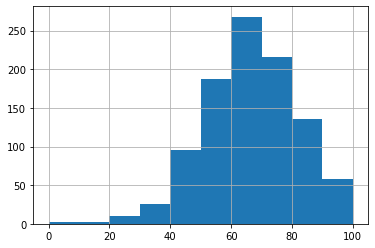

In [424]:
df = df.rename(columns = {
    'math score' : 'math_score',
    'reading score' : 'reading_score',
    'writing score' : 'writing_score'
})
df.math_score.hist()

<AxesSubplot:xlabel='math_score', ylabel='reading_score'>

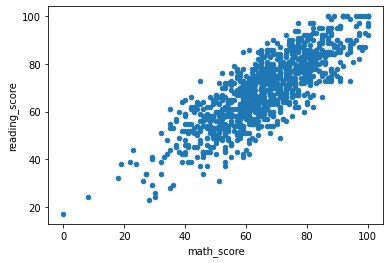

In [426]:
df.plot.scatter(x="math_score", y="reading_score")

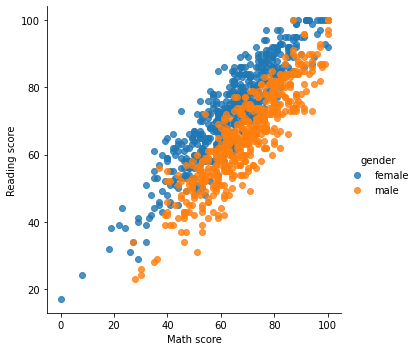

In [437]:
import seaborn as sns
ax = sns.lmplot(x="math_score", y="reading_score", hue="gender", data=df, fit_reg=False)
ax.set_xlabels("Math score")
ax.set_ylabels("Reading score")

**Задание:**

Представьте, что у вас есть датафрэйм df, хранящий данные о зарплате за месяц, со всего 1-ой колонкой income.

Укажите верные способы, как отрисовать простой график зависимости зарплаты от даты (то, как отображается дата сейчас не важно, главное сам график)

In [441]:
import seaborn as sns
df = pd.read_csv('data/income.csv')
df

,income
2018-11-30,20
2018-12-31,60
2019-01-31,180
2019-02-28,380
2019-03-31,660


<AxesSubplot:>

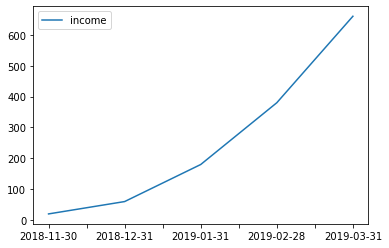

In [442]:
df.plot(kind="line")

<AxesSubplot:>

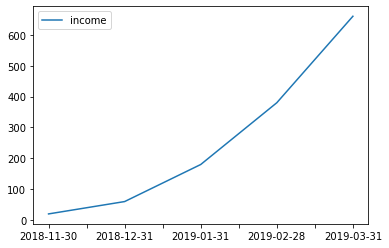

In [443]:
df.plot()

<AxesSubplot:>

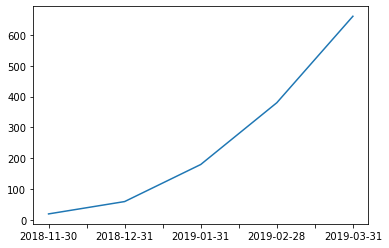

In [446]:
df.income.plot()

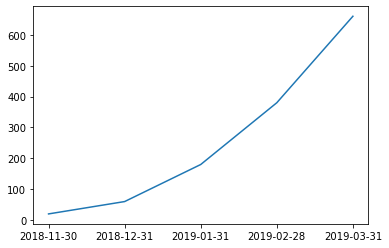

In [448]:
import matplotlib.pyplot as plt
plt.plot(df.index, df.income)

<AxesSubplot:ylabel='income'>

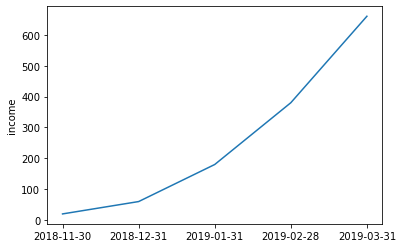

In [449]:
sns.lineplot(x=df.index, y=df.income)

<AxesSubplot:>

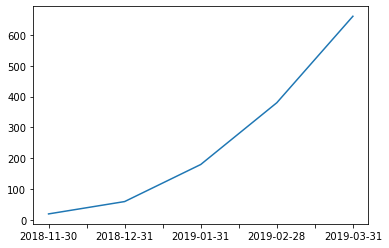

In [450]:
df['income'].plot()

<AxesSubplot:>

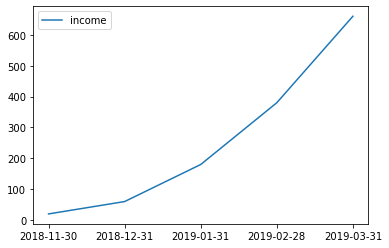

In [451]:
sns.lineplot(data = df)

**Задание:**

Вам дан датасэт с 2-мя фичами (колонками). Постройте график распределения точек (наблюдений) в пространстве этих 2-ух переменных (одна из них будет x, а другая - y) и напишите число кластеров, формируемых наблюдениями.

In [462]:
df = pd.read_csv('data/dataset_209770_6.txt', sep=" ")
df

,x,y
0,607.556966,603.779431
1,1498.894987,914.408994
2,91.723505,402.083886
3,1483.489707,899.588882
4,206.787619,1514.441439
...,...,...
65,409.812998,1296.175357
66,291.155832,301.084759
67,102.343425,412.018688
68,597.947979,613.888166


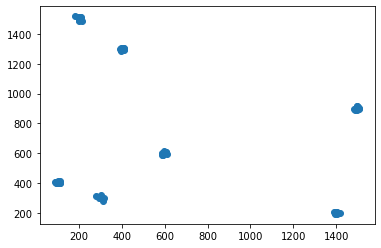

In [466]:
plt.scatter(x="x", y="y", data=df)

In [474]:
df = pd.read_csv("data/genome_matrix.csv")
# df = pd.read_csv('data/genome_matrix.csv', index_col=0)

df

,Unnamed: 0,species0,species1,species2,species3,species4
0,species0,0.536029,0.920292,0.679708,0.840606,0.430842
1,species1,0.920292,0.862417,0.887593,0.769754,0.203214
2,species2,0.679708,0.887593,0.595156,0.003435,0.096052
3,species3,0.840606,0.769754,0.003435,0.458870,0.029251
4,species4,0.430842,0.203214,0.096052,0.029251,0.642109


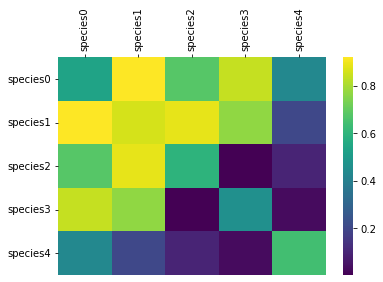

In [492]:
df_frame = df.iloc[:, 1:6]
g = sns.heatmap(df_frame, yticklabels=df["Unnamed: 0"], cmap="viridis")
g.xaxis.set_ticks_position('top')
g.xaxis.set_tick_params(rotation=90)

**Задание:**

Пришло время узнать, какая роль в dota самая распространённая. Скачайте датасэт с данными о героях из игры dota 2 и посмотрите на распределение их возможных ролей в игре (колонка roles). Постройте гистограмму, отражающую скольким героям сколько ролей приписывается (по мнению Valve, конечно) и напишите какое число ролей у большинства героев.

In [653]:
df = pd.read_csv('data/dota_hero_stats.csv')
df.head()

,Unnamed: 0,attack_type,id,legs,localized_name,name,primary_attr,roles
0,0,Melee,1,2,Anti-Mage,npc_dota_hero_antimage,agi,"['Carry', 'Escape', 'Nuker']"
1,1,Melee,2,2,Axe,npc_dota_hero_axe,str,"['Initiator', 'Durable', 'Disabler', 'Jungler']"
2,2,Ranged,3,4,Bane,npc_dota_hero_bane,int,"['Support', 'Disabler', 'Nuker', 'Durable']"
3,3,Melee,4,2,Bloodseeker,npc_dota_hero_bloodseeker,agi,"['Carry', 'Disabler', 'Jungler', 'Nuker', 'Ini..."
4,4,Ranged,5,2,Crystal Maiden,npc_dota_hero_crystal_maiden,int,"['Support', 'Disabler', 'Nuker', 'Jungler']"


0    4
Name: count, dtype: int64

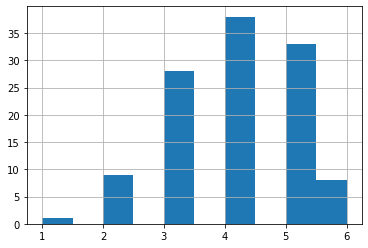

In [658]:
df['count'] = df.roles.str.count(',')+1
df['count'].hist()
df['count'].mode()

Это мне стало интересно, какая роль наиболее популярная:

,roles,Quantities
0,Carry,64
1,Escape,47
2,Nuker,84
3,Initiator,53
4,Durable,47
5,Disabler,86
6,Jungler,15
7,Support,43
8,Pusher,29


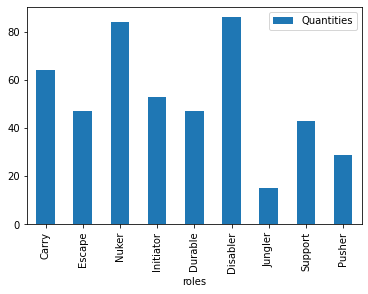

In [639]:
list_of_roles = []
for i, k in df.roles.items():
    roles = k[2:-2]
    list_of_roles.append(roles.split("', '"))
df['list_of_roles'] = list_of_roles

number_of_roles = {}
for i in df.list_of_roles:
    for j in i:
        if j not in number_of_roles:
            number_of_roles[f'{j}'] = 1
        else:
            number_of_roles[f'{j}'] += 1
quantities = pd.DataFrame(list(number_of_roles.items()), columns = ['roles', 'Quantities'])
quantities.plot(kind="bar", x="roles")
quantities

In [672]:
df = pd.read_csv("data/iris.csv")
df.head()

,Unnamed: 0,sepal length,sepal width,petal length,petal width,species
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,145,6.7,3.0,5.2,2.3,2
146,146,6.3,2.5,5.0,1.9,2
147,147,6.5,3.0,5.2,2.0,2
148,148,6.2,3.4,5.4,2.3,2


In [ ]:
df = df.drop(['species'], axis=1)

In [680]:
df = df.drop(['Unnamed: 0'], axis=1)

<AxesSubplot:ylabel='Density'>

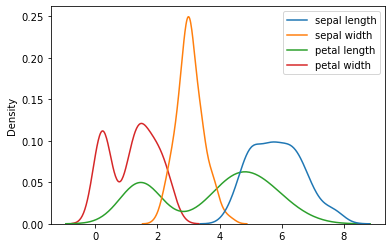

In [682]:
sns.kdeplot(data=df)

<AxesSubplot:>

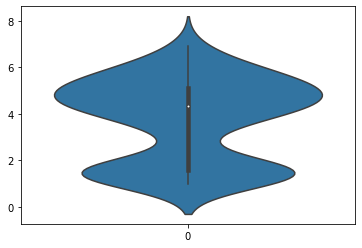

In [684]:
sns.violinplot(data=df['petal length'])

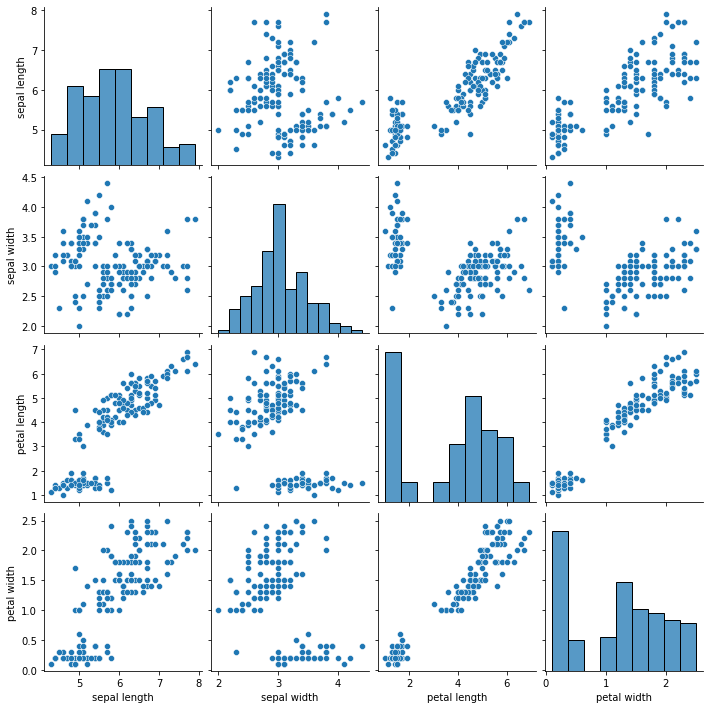

In [686]:
sns.pairplot(data=df)

**Задание:**

Любым удобным для вас способом создайте dataframe c именем my_data, в котором две колонки c именами (type - строки, value - целые числа) и четыре наблюдения в каждой колонке:

In [689]:
my_data = pd.DataFrame({"type":['A', 'A', 'B', 'B'],
           "value":[10, 14, 12, 23]})
my_data


,type,value
0,A,10
1,A,14
2,B,12
3,B,23


**Задание:**

Начнем с простого, в dataframe с именем my_stat сохранено 20 строк и четыре колонки (V1, V2, V3, V4):

В переменную с именем subset_1 сохраните только первые 10 строк и только 1 и 3 колонку.
В переменную с именем subset_2 сохраните все строки кроме 1 и 5 и только 2 и 4 колонку.

In [693]:
my_stat = pd.read_csv("data/my_stat.csv")
my_stat

,V1,V2,V3,V4
0,2,13.0,B,1.0
1,-1,7.0,B,1.0
2,0,11.0,A,0.0
3,2,11.0,A,2.0
4,0,10.0,B,-1.0
...,...,...,...,...
495,1,8.0,A,-1.0
496,3,8.0,A,1.0
497,-1,11.0,B,2.0
498,1,11.0,A,2.0


In [718]:
subset_1 = my_stat.iloc[0:10, [0, 2]]
subset_2 = my_stat.iloc[:, [1, 3]]
subset_2 = subset_2.drop(labels=[0,4], axis = 0)

**Задание:**

Теперь потренируемся отбирать нужные нам наблюдения (строки), соответствующие некому условию. В dataframe с именем my_stat четыре колонки V1, V2, V3, V4:

В переменную subset_1 сохраните только те наблюдения, у которых значения переменной V1  строго больше 0, и значение переменной V3  равняется 'A'.

В переменную  subset_2  сохраните только те наблюдения, у которых значения переменной V2  не равняются 10, или значения переменной V4 больше или равно 1.

In [729]:
subset_1 = my_stat.query("V1 > 0 & V3 == 'A'")
subset_2 = my_stat.query("V2 != 10 | V4 >= 1")

<img src="img/speed1.png">

*iloc и loc быстрее, чем query*

**Задание:**

Теперь давайте преобразуем наши данные. В переменной my_stat лежат данные с которыми вам необходимо проделать следующее дейтвие. В этих данных (my_stat) создайте две новые переменных:

V5 = V1 + V4

V6 = натуральный логарифм переменной V2

In [733]:
my_stat['V5'] = my_stat['V1'] + my_stat['V4']
my_stat['V6'] = np.log(my_stat['V2'])
my_stat

,V1,V2,V3,V4,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


**Задание:**

Переменные V1, V2  ... такие имена никуда не годятся. С такими названиями легко запутаться в собственных данных и в результате ошибиться в расчетах.

Переименуйте колонки в данных  my_stat следующим образом:

V1 -> session_value

V2 -> group

V3 -> time

V4 -> n_users

In [738]:
my_stat = my_stat.rename(columns = {"V1":"session_value", "V2":"group", "V3":"time", "V4":"n_users"})
my_stat

,session_value,group,time,n_users,V5,V6
0,2,13.0,B,1.0,3.0,2.564949
1,-1,7.0,B,1.0,0.0,1.945910
2,0,11.0,A,0.0,0.0,2.397895
3,2,11.0,A,2.0,4.0,2.397895
4,0,10.0,B,-1.0,-1.0,2.302585
...,...,...,...,...,...,...
495,1,8.0,A,-1.0,0.0,2.079442
496,3,8.0,A,1.0,4.0,2.079442
497,-1,11.0,B,2.0,1.0,2.397895
498,1,11.0,A,2.0,3.0,2.397895


**Задание:**

В dataframe с именем my_stat сохранены данные с 4 колонками: session_value, group, time, n_users.  

В переменной session_value замените все пропущенные значения на нули.

В переменной n_users замените все отрицательные значения на медианное значение переменной n_users (без учета отрицательных значений, разумеется).

In [791]:
my_stat = pd.read_csv("data/my_stat_1.csv")
my_stat.loc[np.isnan(my_stat["session_value"]), "session_value"] = 0
median = my_stat.loc[my_stat.n_users >= 0].n_users.median()
my_stat.loc[my_stat.n_users < 0, "n_users"] = median

**Задание:**

В этой задаче для данных my_stat рассчитайте среднее значение переменной session_value для каждой группы (переменная group), в получившемся dataframe  переменная group не должна превратиться в индекс. Также переименуйте колонку со средним значением session_value в mean_session_value.

Получившийся результат сохраните в dataframe с именем mean_session_value_data.

In [800]:
mean_session_value_data = my_stat.groupby('group', as_index = False). \
                            agg({"session_value":"mean"}). \
                            rename(columns={"session_value":"mean_session_value"})

   session_value  time group  n_users
0            0.0    12     B        9
1            0.0    11     A        5
2            1.0     8     A        1
3            2.0     9     B        3
4            2.0    10     B        9
5            3.0     8     A        8
6            0.0    11     B        5
7            0.0     9     A        4
8            0.0     8     B        5
9            0.0     9     A        5


,group,mean_session_value
0,A,0.8
1,B,0.8


### Анализ данных со Stepik

In [801]:
df = pd.read_csv("data/event_data_train.csv")
df

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [802]:
df['date'] = pd.to_datetime(df.timestamp, unit='s')

In [804]:
df.head()

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35


In [806]:
df.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [807]:
df.date.min()

Timestamp('2015-06-15 04:00:48')

In [808]:
df.date.max()

Timestamp('2018-05-19 23:33:31')

In [811]:
df['day'] = df.date.dt.date

In [812]:
df.head()

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15


In [815]:
sns.set(rc={'figure.figsize':(9, 6)})

<AxesSubplot:xlabel='day'>

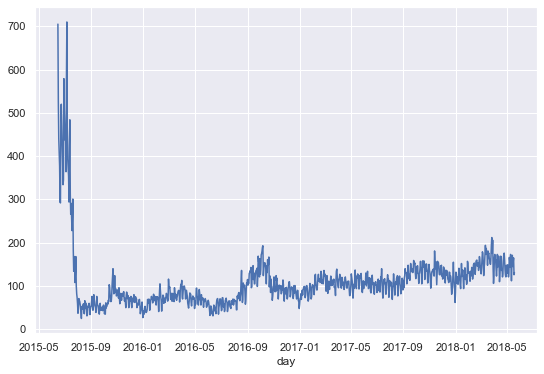

In [816]:
df.groupby('day') \
    .user_id.nunique().plot()

<AxesSubplot:>

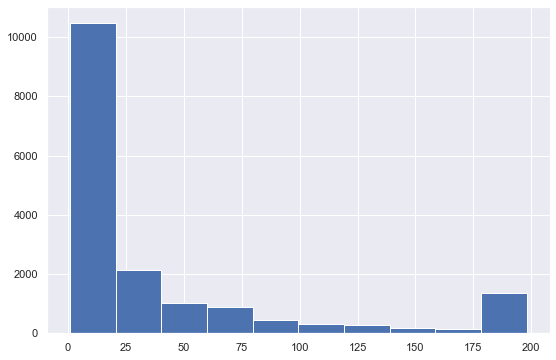

In [821]:
# неправильное решение (мы не взяли людей, которые не прошли не одного степа)
"""
df[df.action == 'passed'] \
    .groupby('user_id', as_index=False) \
    .agg({'step_id':'count'}) \
    .rename(columns={'step_id':'passed_steps'}).passed_steps.hist()
"""

In [931]:
users_events_data = df.pivot_table(index='user_id', 
               columns='action', 
               values='step_id', 
               aggfunc='count',
               fill_value=0).reset_index()

<AxesSubplot:>

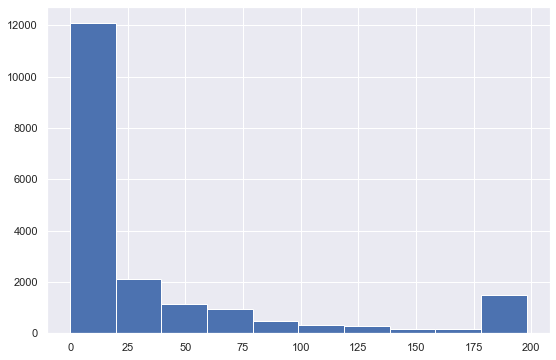

In [933]:
users_events_data.discovered.hist()

In [836]:
submissions_data = pd.read_csv('data/submissions_data_train.csv')
submissions_dataissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [838]:
submissions_data['date'] = pd.to_datetime(submissions_data.timestamp, unit='s')
submissions_data.head()

,step_id,timestamp,submission_status,user_id,date
0,31971,1434349275,correct,15853,2015-06-15 06:21:15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49
3,31972,1478852164,correct,15853,2016-11-11 08:16:04
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03


In [844]:
users_scores = submissions_data.pivot_table(index='user_id', 
               columns='submission_status', 
               values='step_id', 
               aggfunc='count',
               fill_value=0).reset_index()
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [856]:
gap_data = df[['user_id', 'day', 'timestamp']].drop_duplicates(subset=['user_id', 'day']) \
    .groupby('user_id')['timestamp'].apply(list) \
    .apply(np.diff).values

In [858]:
gap_data = pd.Series(np.concatenate(gap_data, axis = 0))

In [863]:
gap_data = gap_data / (24*60*60)

<AxesSubplot:>

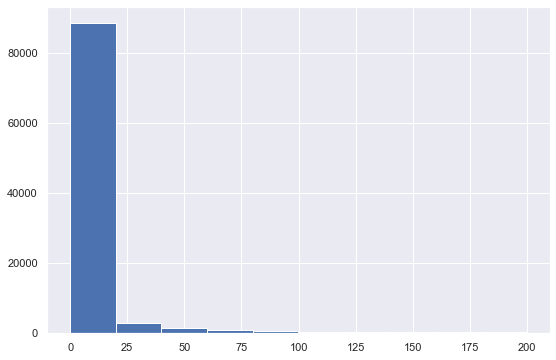

In [864]:
gap_data[gap_data < 200].hist()

In [865]:
gap_data.quantile(0.95)

59.760440972222156

In [885]:
df[df['user_id'] == 17632]

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
2516082,31977,1505649526,viewed,17632,2017-09-17 11:58:46,2017-09-17
2516083,31976,1505649530,viewed,17632,2017-09-17 11:58:50,2017-09-17
2516084,31972,1505649532,viewed,17632,2017-09-17 11:58:52,2017-09-17
2516085,31971,1505649536,viewed,17632,2017-09-17 11:58:56,2017-09-17


In [912]:
df.pivot_table(index='user_id', 
               values='day',
               aggfunc='count').sort_values('day', ascending=False)

day    909
Name: 17632, dtype: int64


,day
user_id,
20907,33043
10794,16436
25279,10179
1046,9095
3572,7905
...,...
19546,2
1,2
11437,1


In [913]:
df.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [918]:
now = 1526772811
drop_out_threshold = 30 * 24 * 60 * 60

In [917]:
users_data = df.groupby('user_id', as_index=False) \
    .agg({'timestamp':'max'}).rename(columns={'timestamp':'timestamp_last'})

In [921]:
users_data['is_gone'] = (now - users_data.timestamp_last) > drop_out_threshold
users_data

,user_id,timestamp_last,is_gone
0,1,1472827464,True
1,2,1519226966,True
2,3,1444581588,True
3,5,1499859939,True
4,7,1521634660,True
...,...,...,...
19229,26790,1517495987,True
19230,26793,1510225034,True
19231,26794,1512035039,True
19232,26797,1509995096,True


In [922]:
users_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [926]:
users_data = users_data.merge(users_scores, on='user_id', how='outer')

In [929]:
users_data.fillna(0)

,user_id,timestamp_last,is_gone,correct,wrong
0,1,1472827464,True,0.0,0.0
1,2,1519226966,True,2.0,0.0
2,3,1444581588,True,29.0,23.0
3,5,1499859939,True,2.0,2.0
4,7,1521634660,True,0.0,0.0
...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0
19230,26793,1510225034,True,0.0,0.0
19231,26794,1512035039,True,33.0,9.0
19232,26797,1509995096,True,2.0,0.0


In [934]:
users_data = users_data.merge(users_events_data, how='outer')

In [935]:
users_data

,user_id,timestamp_last,is_gone,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,True,NaN,NaN,1,0,0,1
1,2,1519226966,True,2.0,0.0,9,9,2,10
2,3,1444581588,True,29.0,23.0,91,87,30,192
3,5,1499859939,True,2.0,2.0,11,11,4,12
4,7,1521634660,True,NaN,NaN,1,1,0,1
...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,True,NaN,NaN,1,0,1,1
19231,26794,1512035039,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,True,2.0,0.0,10,10,2,13


In [936]:
users_days = df.groupby('user_id').day.nunique().

In [941]:
users_days = users_days.to_frame().reset_index()

In [942]:
users_data = users_data.merge(users_days, how='outer')

In [946]:
df.user_id.nunique()

19234

In [945]:
users_data.user_id.nunique()

19234

In [948]:
users_data['passed_course'] = users_data.passed > 170
users_data.groupby('passed_course').count()

,user_id,timestamp_last,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,day
passed_course,,,,,,,,,,
False,17809,17809,17809,8515,8515,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [950]:
1425 / 17809 * 100

8.001572238755687

### Решающие деревья

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [103]:
from IPython.display import HTML
style = "<style>svg{width:10% !important:height:70% !important;}</style>"
HTML(style)

In [10]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

,X_1,X_2,Y
0,1,0,1
1,1,0,1
2,1,0,1
3,0,1,1
4,0,0,0
5,0,0,0
6,0,0,0
7,1,1,0


In [11]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [12]:
X = data[['X_1', 'X_2']]
y = data.Y

In [13]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

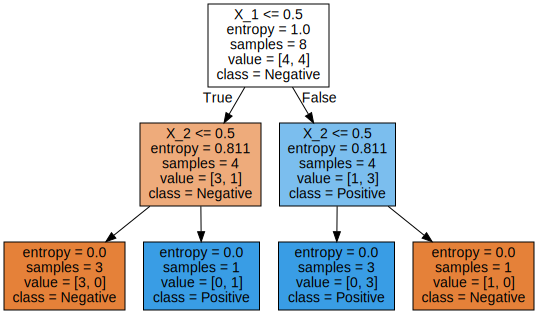

In [16]:
graph = Source(tree.export_graphviz(clf, out_file=None,
                                    feature_names=list(X),
                                    class_names=['Negative', 'Positive'],
                                    filled=True))
display(SVG(graph.pipe(format='svg')))

Вычисления:

In [43]:
E0_shert = -(1/1)*np.log2(1/1)
print(E0_shert)
E1_shert = -(4/9)*np.log2(4/9) - (5/9)*np.log2(5/9)
print(E1_shert)
E0_gav = -(4/5)*np.log2(4/5) - (1/5)*np.log2(1/5)
print(E0_gav)
E1_gav = -(5/5)*np.log2(5/5)
print(E1_gav)
E0_tree = (4/4)*np.log2(4/4)
print(E0_tree)
E1_tree = (6/6)*np.log2(6/6)
print(E1_tree)

-0.0
0.9910760598382222
0.7219280948873623
-0.0
0.0
0.0


In [52]:
E = -(4/10)*np.log2(4/10) - (6/10)*np.log2(6/10)
IG_shert = E - (E0_shert*(1/10) + E1_shert*(9/10))
print(IG_shert)
IG_gav = E - (E0_gav*(5/10) + E1_gav*(5/10))
print(IG_gav)
IG_tree = E - (E0_tree*(4/10) + E1_tree*(6/10))
print(IG_tree)
E

0.07898214060026854
0.6099865470109874
0.9709505944546686


0.9709505944546686

### Titanic: Machine Learning from Disaster

In [1]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [3]:
from IPython.display import HTML
style = "<style>svg{width:10% !important:height:70% !important;}</style>"
HTML(style)

In [6]:
titanic_data = pd.read_csv('data/train.csv')
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
X = titanic_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis = 1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [9]:
y = titanic_data.Survived

In [10]:
X = pd.get_dummies(X)

In [11]:
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,1
1,1,38.0,1,0,71.2833,1,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,1


In [12]:
X = X.fillna({'Age': X.Age.median()})

In [13]:
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [14]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [15]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

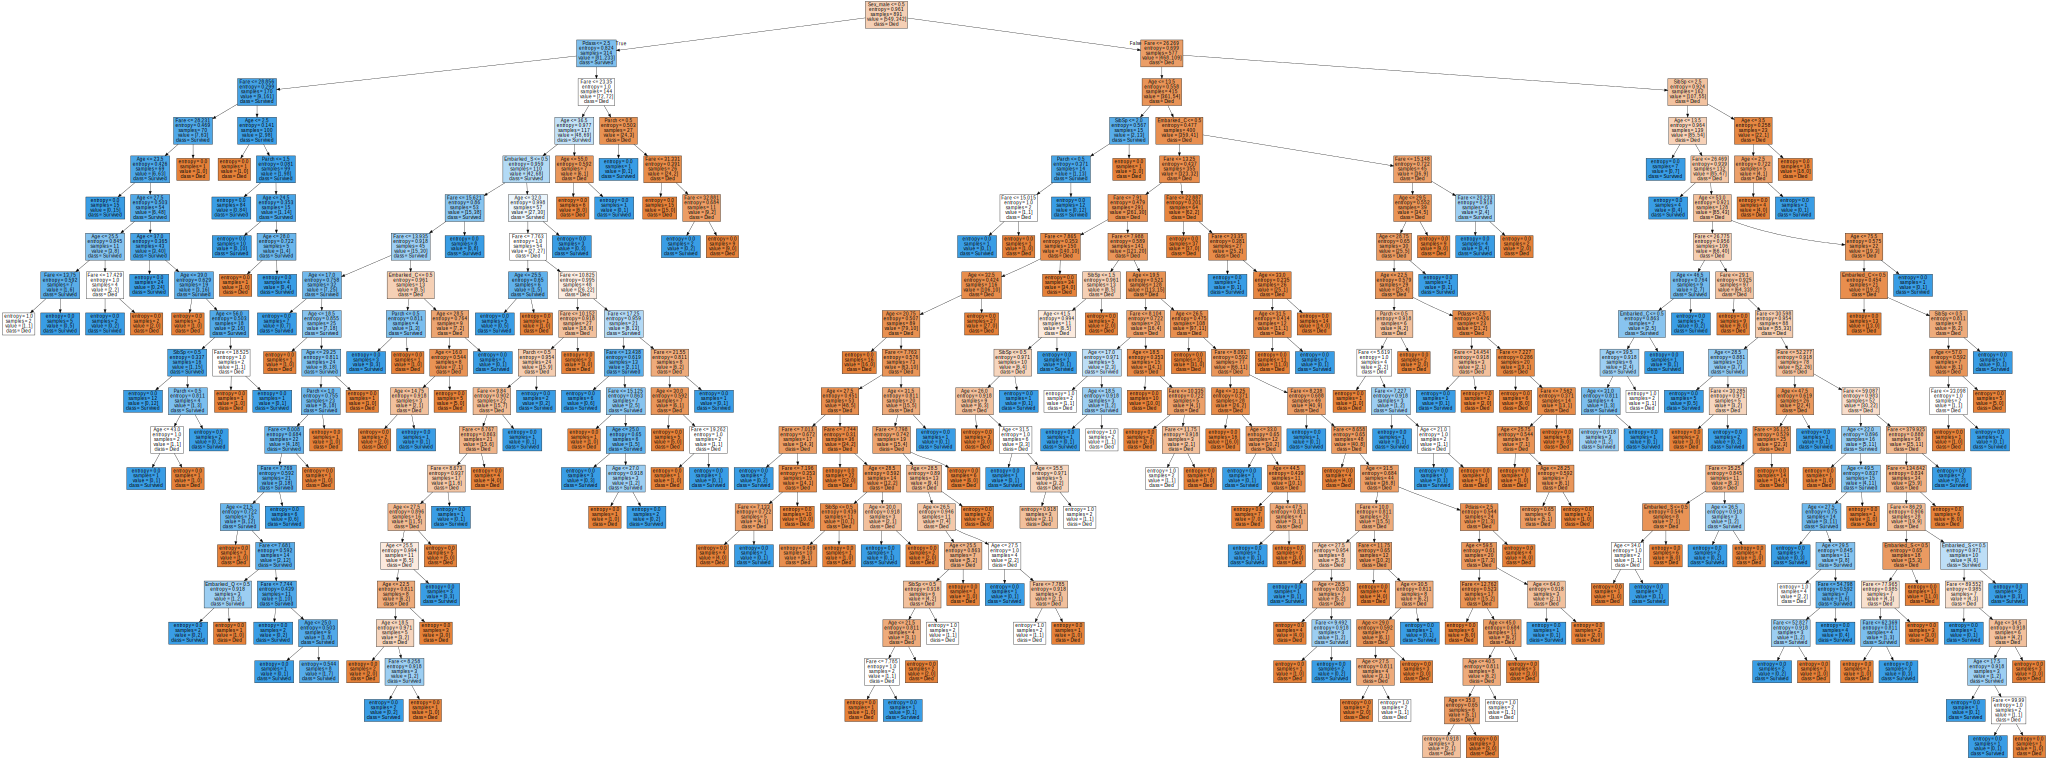

In [16]:
graph = Source(tree.export_graphviz(clf, out_file=None
               , feature_names=list(X), class_names=['Died', 'Survived']
               , filled = True))
display(SVG(graph.pipe(format='svg')))

In [4]:
from sklearn.model_selection import train_test_split

In [18]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [20]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [21]:
clf.score(X_train, y_train)

0.8238255033557047

In [22]:
clf.score(X_test, y_test)

0.8203389830508474

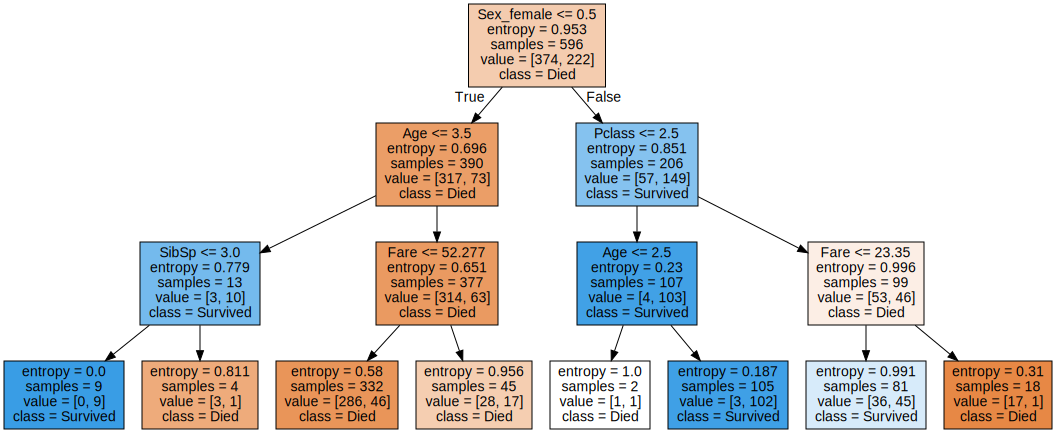

In [23]:
graph = Source(tree.export_graphviz(clf, out_file=None
               , feature_names=list(X), class_names=['Died', 'Survived']
               , filled = True))
display(SVG(graph.pipe(format='svg')))

In [24]:
scores_data = pd.DataFrame()

In [30]:
max_depth_values = range(1, 100)

for max_depth in max_depth_values:
    clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    temp_score_data = pd.DataFrame({'max_depth':[max_depth], 
                                    'train_score':[train_score], 
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score]})
    scores_data = pd.concat([scores_data, temp_score_data])
scores_data

,max_depth,train_score,test_score,cross_val_score
0,1,0.781879,0.796610,0.781961
0,2,0.805369,0.776271,0.770196
0,3,0.823826,0.820339,0.790322
0,4,0.833893,0.823729,0.788627
0,5,0.840604,0.806780,0.797031
...,...,...,...,...
0,95,0.979866,0.776271,0.765140
0,96,0.979866,0.776271,0.761779
0,97,0.979866,0.769492,0.766821
0,98,0.979866,0.783051,0.768501


In [33]:
scores_data_long = pd.melt(scores_data, id_vars=['max_depth'], value_vars=['train_score', 'test_score', 'cross_val_score'], var_name='set_type', value_name='score')
scores_data_long

,max_depth,set_type,score
0,1,train_score,0.781879
1,2,train_score,0.805369
2,3,train_score,0.823826
3,4,train_score,0.833893
4,5,train_score,0.840604
...,...,...,...
589,95,cross_val_score,0.765140
590,96,cross_val_score,0.761779
591,97,cross_val_score,0.766821
592,98,cross_val_score,0.768501


<AxesSubplot:xlabel='max_depth', ylabel='score'>

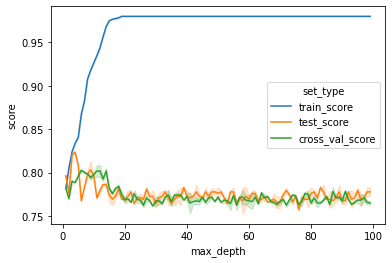

In [34]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = scores_data_long)

In [42]:
scores_data_long.query('set_type == "cross_val_score"').head(20)

,max_depth,set_type,score
396,1,cross_val_score,0.781961
397,2,cross_val_score,0.770196
398,3,cross_val_score,0.790322
399,4,cross_val_score,0.788627
400,5,cross_val_score,0.797031
401,6,cross_val_score,0.802073
402,7,cross_val_score,0.798697
403,8,cross_val_score,0.798683
404,9,cross_val_score,0.796989
405,10,cross_val_score,0.795308


In [5]:
from sklearn.model_selection import cross_val_score

In [7]:
best_clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=12)

In [43]:
cross_val_score(clf, X_test, y_test, cv=5).mean()

0.7932203389830509

**Задание:**

Скачайте тренировочный датасэт с ирисами, обучите деревья с глубиной от 1 до 100. Целевой переменной при обучении является переменная species. При этом записывайте его скор (DecisionTreeClassifier.score()) на тренировочных данных, и аккуратность предсказаний (accuracy_score) на тестовом датасэте. Затем визуализируйте зависимость скора и аккуратности предсказаний от глубины дерева и выберите правильную визуализацию из предложенных.

In [6]:
import numpy as np

In [41]:
train_iris = pd.read_csv('data/train_iris.csv')
train_iris = train_iris.drop(['Unnamed: 0'], axis = 1) 

In [42]:
X = train_iris.drop(labels = ['species'], axis=1)
y = train_iris.species.to_frame()

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)
X_train

,sepal length,sepal width,petal length,petal width
31,5.2,3.5,1.5,0.2
88,6.3,2.5,4.9,1.5
11,5.0,3.2,1.2,0.2
58,6.4,2.9,4.3,1.3
85,6.5,3.2,5.1,2.0
...,...,...,...,...
0,7.4,2.8,6.1,1.9
72,6.0,2.2,5.0,1.5
56,6.7,3.1,5.6,2.4
3,5.8,2.7,5.1,1.9


In [44]:
score_values = pd.DataFrame()

In [45]:
final_data = pd.read_csv('data/test_iris.csv')
final_data = final_data.drop(['Unnamed: 0'], axis = 1)
X_final = final_data.drop(['species'], axis=1)
y_final = final_data.species.to_frame()

In [51]:
np.random.seed(0)
for depth in range(1, 100):
    clf = tree.DecisionTreeClassifier(random_state=np.random.seed(depth), criterion='entropy', max_depth=depth)
    clf.fit(X_train, y_train)
    train_score = clf.score(X_train, y_train)
    test_score = clf.score(X_test, y_test)
    
    mean_cross_val_score = cross_val_score(clf, X_train, y_train, cv = 5).mean()
    
    final_test_score = clf.score(X_final, y_final)
    temp_score_data = pd.DataFrame({'max_depth':[depth],
                                    'train_score':[train_score],
                                    'test_score':[test_score],
                                    'cross_val_score':[mean_cross_val_score],
                                    'final_test_score':[final_test_score]})
    score_values = pd.concat([score_values, temp_score_data])
score_values

,max_depth,train_score,test_score,cross_val_score,final_test_score
0,1,0.686567,0.727273,0.695238,0.60
0,2,0.970149,0.969697,0.938095,0.94
0,3,0.985075,1.000000,0.909524,0.94
0,4,1.000000,1.000000,0.909524,0.92
0,5,1.000000,1.000000,0.909524,0.92
...,...,...,...,...,...
0,95,1.000000,1.000000,0.926374,0.92
0,96,1.000000,1.000000,0.912088,0.92
0,97,1.000000,1.000000,0.926374,0.92
0,98,1.000000,1.000000,0.910989,0.92


In [52]:
score_data_long = pd.melt(score_values, id_vars = 'max_depth', value_vars=['train_score' \
                                                                          , 'test_score' \
                                                                          , 'cross_val_score' \
                                                                          , 'final_test_score'],
                          var_name='set_type', value_name='score')
score_data_long

,max_depth,set_type,score
0,1,train_score,0.686567
1,2,train_score,0.970149
2,3,train_score,0.985075
3,4,train_score,1.000000
4,5,train_score,1.000000
...,...,...,...
1183,95,final_test_score,0.920000
1184,96,final_test_score,0.920000
1185,97,final_test_score,0.920000
1186,98,final_test_score,0.920000


<AxesSubplot:xlabel='max_depth', ylabel='score'>

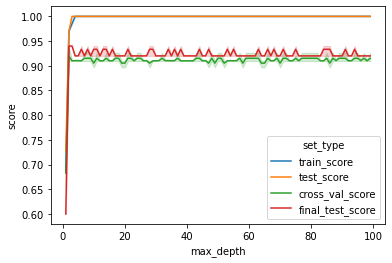

In [53]:
sns.lineplot(x='max_depth', y='score', hue='set_type', data = score_data_long)

**Задание:**

Мы собрали побольше данных о котиках и собачках, и готовы обучить нашего робота их классифицировать! Скачайте тренировочный датасэт и  обучите на нём Decision Tree. После этого скачайте датасэт из задания и предскажите какие наблюдения к кому относятся. Введите число собачек в вашем датасэте.

In [73]:
dogs_n_cats = pd.read_csv('data/dogs_n_cats.csv')
dogs_n_cats

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям,Вид
0,15,18.0,1,1,0,собачка
1,20,24.0,1,0,0,собачка
2,34,40.8,1,1,0,собачка
3,26,31.2,1,1,0,собачка
4,16,19.2,1,1,0,собачка
...,...,...,...,...,...,...
995,8,3.2,1,0,1,котик
996,7,2.8,1,0,1,котик
997,6,2.4,1,0,1,котик
998,7,2.8,1,0,1,котик


In [58]:
from sklearn import tree
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

In [60]:
from IPython.display import HTML
style = "<style>svg{width:10% !important:height:70% !important;}</style>"
HTML(style)

In [37]:
from sklearn.model_selection import cross_val_score

In [30]:
from sklearn.model_selection import train_test_split

In [144]:
X = dogs_n_cats.drop(['Вид'], axis = 1)
y = dogs_n_cats['Вид'].to_frame()

In [150]:
clf = tree.DecisionTreeClassifier(random_state=np.random.seed(depth), criterion='entropy', max_depth=1)
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy', max_depth=1)

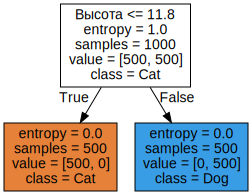

In [149]:
graph = Source(tree.export_graphviz(clf, out_file=None
               , feature_names=list(X), class_names=['Cat', 'Dog']
               , filled = True))
display(SVG(graph.pipe(format='svg')))

In [146]:
data = pd.read_json('data/dataset_209691_15.txt')
data

,Длина,Высота,Шерстист,Гавкает,Лазает по деревьям
0,28,33.6,1,1,0
1,26,31.2,1,1,0
2,20,24.0,1,1,0
3,29,34.8,1,1,0
4,19,22.8,1,0,0
...,...,...,...,...,...
95,9,3.6,1,0,1
96,10,4.0,1,0,1
97,7,2.8,1,0,1
98,5,2.0,1,0,1


In [147]:
a = clf.predict(data)
count = 0
for i in a:
    if i == 'котик':
        count += 1
count

55